In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Reading data from source
df = pd.read_csv(r'/home/aryan/playground/Duplicate Question Detection/data/questions.csv')

In [99]:
# shape of the data
df.shape

(404351, 6)

In [100]:
# Preview of the data
df.head(5)

,"id""",qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [101]:
# Datatypes 
df.dtypes

id"              int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [102]:
# Summary of the dataset
df.describe()

,"id""",qid1,qid2,is_duplicate
count,404351.000000,404351.000000,404351.000000,404351.000000
mean,202175.000000,391840.987691,390195.973765,0.369248
std,116726.223686,228430.857607,228803.645742,0.482602
min,0.000000,1.000000,2.000000,0.000000
25%,101087.500000,193381.000000,191012.000000,0.000000
50%,202175.000000,390630.000000,388364.000000,0.000000
75%,303262.500000,589514.000000,588071.000000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


# Univariate Analysis

In [103]:
# Checking for null values
df.isna().sum()

id"             0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

Insight: The overall proportion of missing data is extremely low, indicating a well-maintained dataset. Only the text fields (question1 and question2) contain null entries, and these are minimal in number. Such a small amount of missing data can be easily handled through simple imputation or by dropping those rows without impacting the dataset’s integrity or model performance.

In [104]:
# Droping null values
df.dropna(inplace=True)

In [105]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

Insight: There are no duplicated rows in the dataset

In [106]:
# Number of values in each label
df['is_duplicate'].value_counts(normalize=True)*100

is_duplicate
0    63.074876
1    36.925124
Name: proportion, dtype: float64

Insight: The target variable is moderately imbalanced, with non-duplicate question pairs being more common. Although the imbalance is not extreme, it is still significant enough that certain models may become biased toward predicting the majority class.

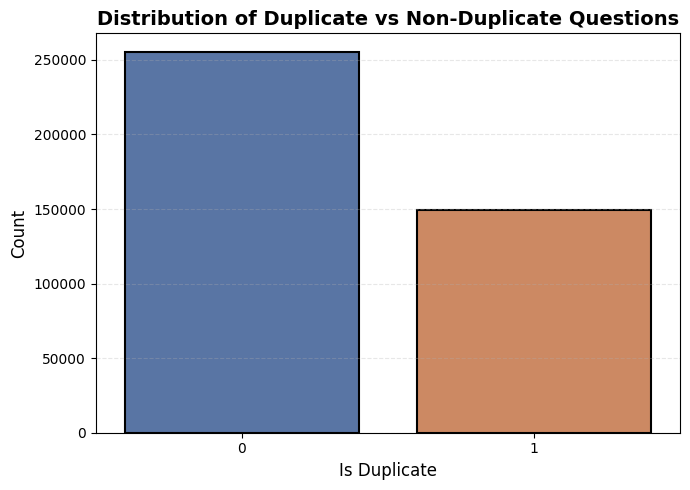

In [107]:
plt.figure(figsize=(7, 5))

# quick countplot to see how many questions are marked duplicate vs not
sns.countplot(
    data=df,
    x='is_duplicate',
    palette=['#4C72B0', '#DD8452'],   # simple two-color palette
    edgecolor='black',                # add a clean border around bars
    linewidth=1.5
)

# add some basic labeling so the plot actually makes sense
plt.title("Distribution of Duplicate vs Non-Duplicate Questions", fontsize=14, weight='bold')
plt.xlabel("Is Duplicate", fontsize=12)
plt.ylabel("Count", fontsize=12)

# subtle horizontal grid just to help eyeball differences
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()  # avoids weird overlapping
plt.show()

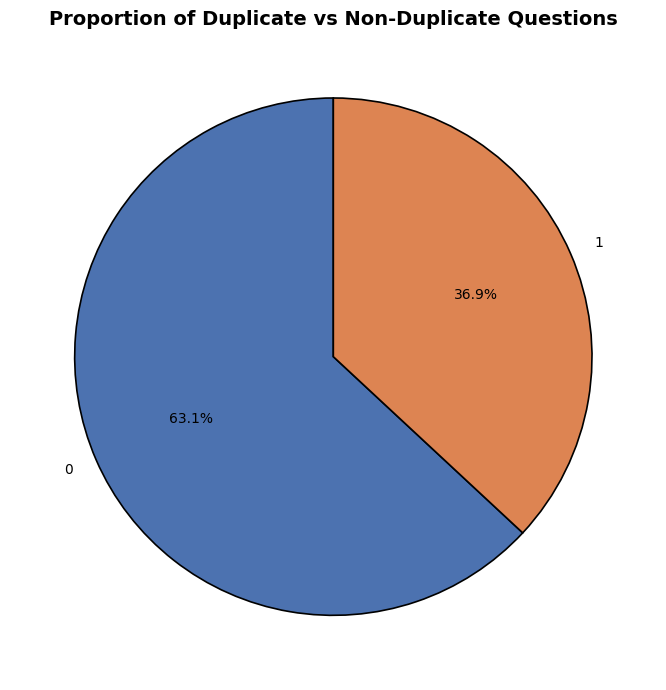

In [108]:
counts = df['is_duplicate'].value_counts()
values = counts.values
labels = counts.index

plt.figure(figsize=(7, 7))

# pie chart with some nicer styling
plt.pie(
    x=values,
    labels=labels,
    autopct='%1.1f%%',          # show percentages on the chart
    startangle=90,
    colors=['#4C72B0', '#DD8452'],  # same colors as countplot for consistency
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}  # give slices a clean border
)

plt.title("Proportion of Duplicate vs Non-Duplicate Questions", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


### how many times each question1 appears in the dataset

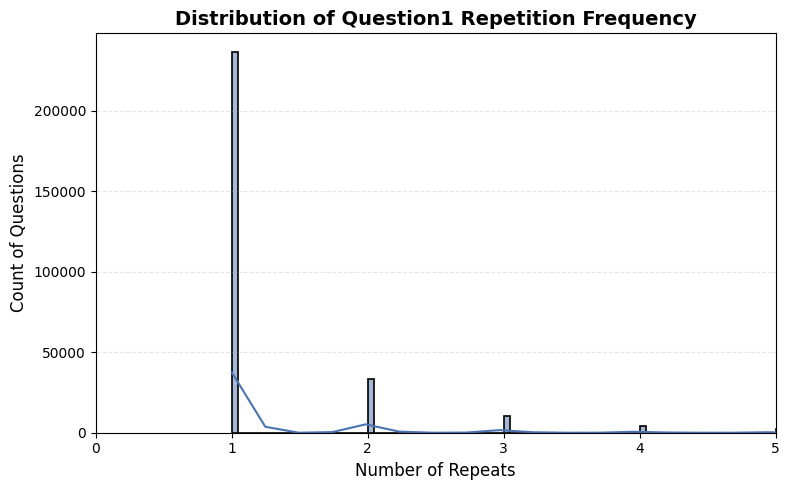

In [109]:
count_question1 = df['question1'].value_counts().values

plt.figure(figsize=(8, 5))

# histogram to see how often questions repeat + kde for smooth trend
sns.histplot(
    count_question1,
    kde=True,
    color="#4C72B0",
    edgecolor="black",
    linewidth=1.2
)

plt.xlim(0, 5)

# basic labels so the plot is readable
plt.title("Distribution of Question1 Repetition Frequency", fontsize=14, weight='bold')
plt.xlabel("Number of Repeats", fontsize=12)
plt.ylabel("Count of Questions", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)  # light grid for easier reading
plt.tight_layout()
plt.show()

Insight: The dataset contains a large number of unique questions and only a few highly repeated ones. This means duplicated questions are not uniformly distributed; instead, a few specific questions get asked multiple times.
The majority of questions appear only once, forming a very tall spike at repeat count 1. A small number of questions repeat 2–3 times, with the frequency dropping sharply as the repetition count increases. Questions repeated more than 3 times are extremely rare, appearing as tiny bars in the distribution. The overall shape of the distribution is highly right-skewed, with a long tail extending toward higher repeat counts.

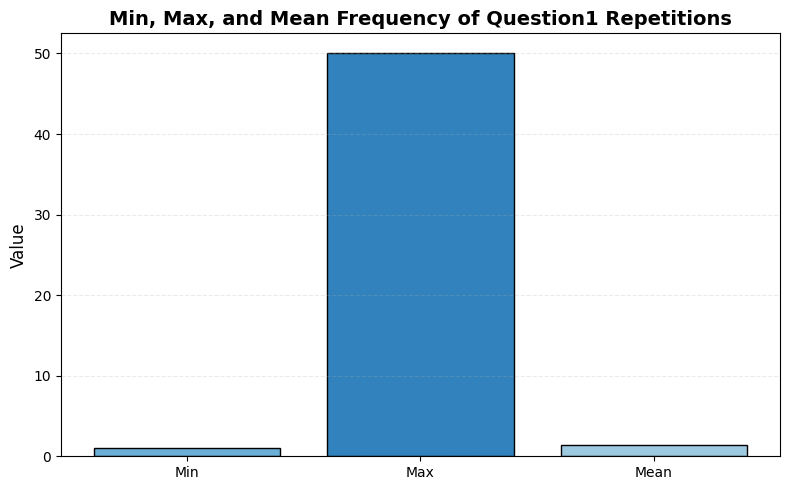

In [110]:
# Calculate statistics
min_val = count_question1.min()
max_val = count_question1.max()
mean_val = count_question1.mean()

labels = ['Min', 'Max', 'Mean']
values = [min_val, max_val, mean_val]

plt.figure(figsize=(8, 5))

# Aesthetic color palette
colors = ['#6BAED6', '#3182BD', '#9ECAE1']  # harmonious blue tones

plt.bar(labels, values, color=colors, edgecolor='black', linewidth=1)

# Title & labels
plt.title("Min, Max, and Mean Frequency of Question1 Repetitions", 
          fontsize=14, fontweight='bold')
plt.ylabel("Value", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.25)

plt.tight_layout()
plt.show()

### how many times each question2 appears in the dataset

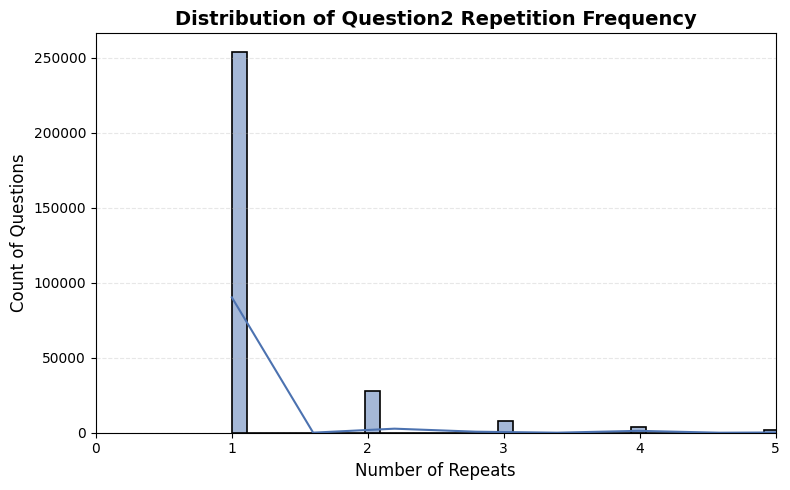

In [111]:
count_question2 = df['question2'].value_counts().values

plt.figure(figsize=(8, 5))

# histogram to see how often questions repeat + kde for smooth trend
sns.histplot(
    count_question2,
    kde=True,
    color="#4C72B0",
    edgecolor="black",
    linewidth=1.2
)

plt.xlim(0, 5)

# basic labels so the plot is readable
plt.title("Distribution of Question2 Repetition Frequency", fontsize=14, weight='bold')
plt.xlabel("Number of Repeats", fontsize=12)
plt.ylabel("Count of Questions", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)  # light grid for easier reading
plt.tight_layout()
plt.show()

Insight: The dataset contains a large number of unique questions and only a few highly repeated ones. This means duplicated questions are not uniformly distributed; instead, a few specific questions get asked multiple times.
The majority of questions appear only once, forming a very tall spike at repeat count 1. A small number of questions repeat 2–3 times, with the frequency dropping sharply as the repetition count increases. Questions repeated more than 3 times are extremely rare, appearing as tiny bars in the distribution. The overall shape of the distribution is highly right-skewed, with a long tail extending toward higher repeat counts.

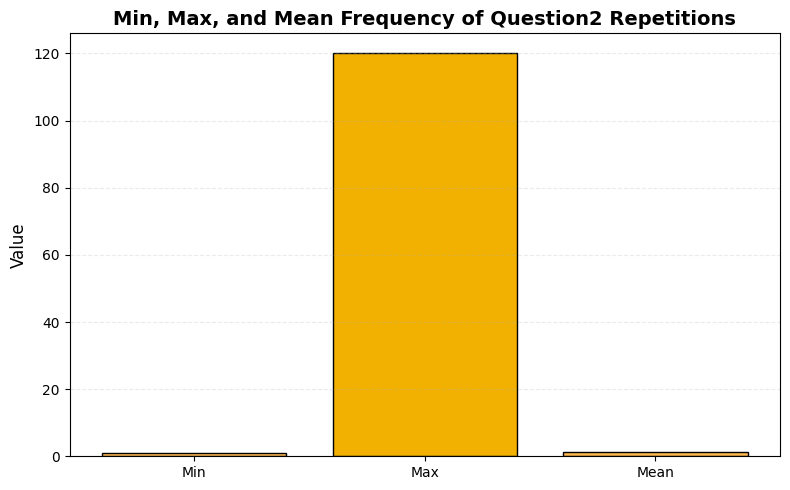

In [112]:
# Calculate statistics
min_val = count_question2.min()
max_val = count_question2.max()
mean_val = count_question2.mean()

labels = ['Min', 'Max', 'Mean']
values = [min_val, max_val, mean_val]

plt.figure(figsize=(8, 5))

# Aesthetic color palette
colors = ["#FFBC56", "#F2B100", "#FFB84F"]  # harmonious blue tones

plt.bar(labels, values, color=colors, edgecolor='black', linewidth=1)

# Title & labels
plt.title("Min, Max, and Mean Frequency of Question2 Repetitions", 
          fontsize=14, fontweight='bold')
plt.ylabel("Value", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.25)

plt.tight_layout()
plt.show()

In [113]:
# Feature Construction from existing feature
df["question1_character_len"] = df['question1'].str.len()
df["question1_word_len"] = df['question1'].apply(lambda x: len(x.split()))

df["question2_character_len"] = df['question2'].str.len()
df["question2_word_len"] = df['question2'].apply(lambda x: len(x.split()))

In [114]:
df.head(5)

,"id""",qid1,qid2,question1,question2,is_duplicate,question1_character_len,question1_word_len,question2_character_len,question2_word_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,14,57,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,8,88,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,14,59,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,11,65,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,13,39,7


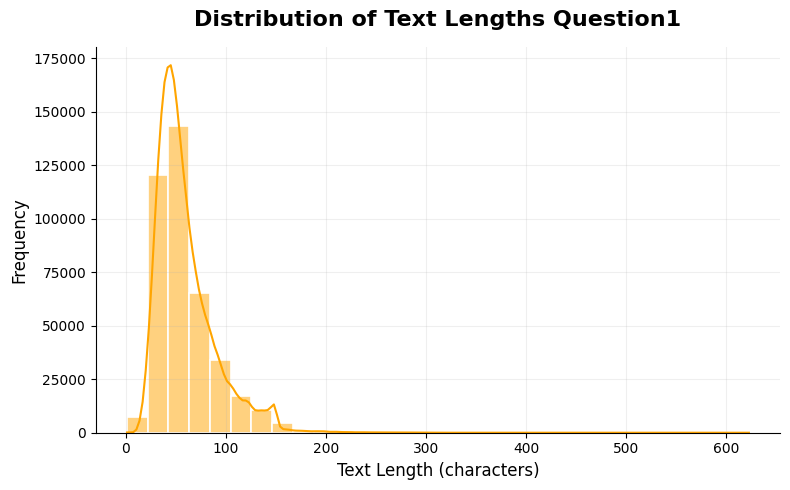

In [115]:
# Text Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['question1_character_len'], kde=True, color='orange', bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of Text Lengths Question1", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Text Length (characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

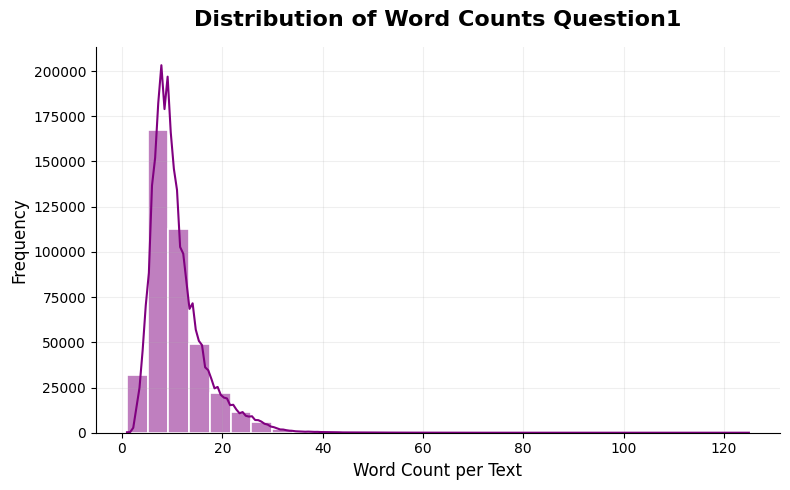

In [116]:
# Word Count Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['question1_word_len'], kde=True, color="purple", bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of Word Counts Question1", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Word Count per Text", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

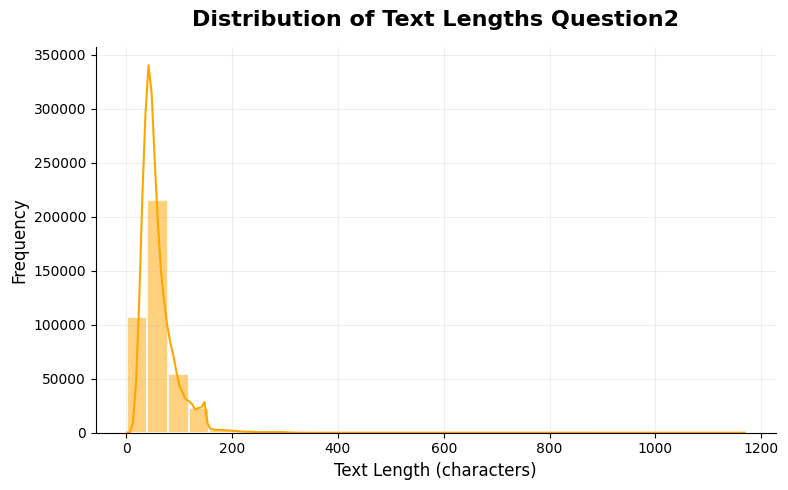

In [117]:
# Text Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['question2_character_len'], kde=True, color='orange', bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of Text Lengths Question2", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Text Length (characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

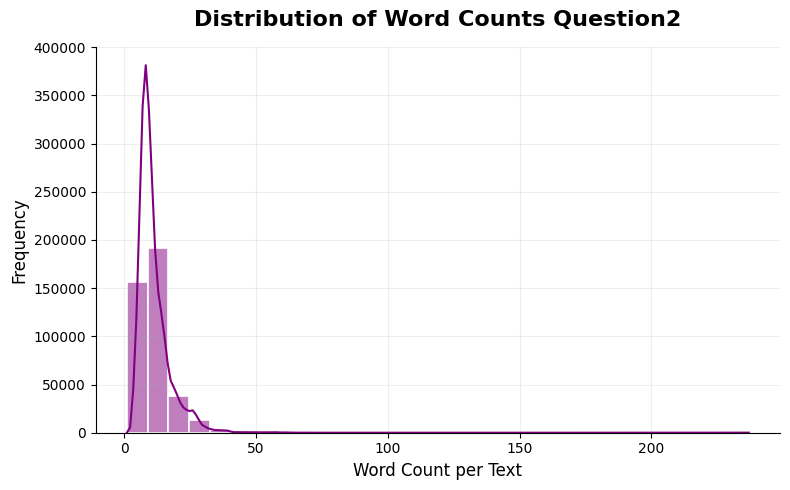

In [118]:
# Word Count Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['question2_word_len'], kde=True, color="purple", bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of Word Counts Question2", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Word Count per Text", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

In [119]:
df.head(5)

,"id""",qid1,qid2,question1,question2,is_duplicate,question1_character_len,question1_word_len,question2_character_len,question2_word_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,14,57,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,8,88,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,14,59,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,11,65,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,13,39,7


In [120]:
import nltk
from nltk.corpus import stopwords

In [121]:
stop = set(stopwords.words('english'))

# Function to count stopwords in a text
def count_stopwords(text):
    if isinstance(text, str):
        return sum(1 for word in text.lower().split() if word in stop)
    return 0

# Apply for q1 and q2
df['q1_stopword_count'] = df['question1'].apply(count_stopwords)
df['q2_stopword_count'] = df['question2'].apply(count_stopwords)

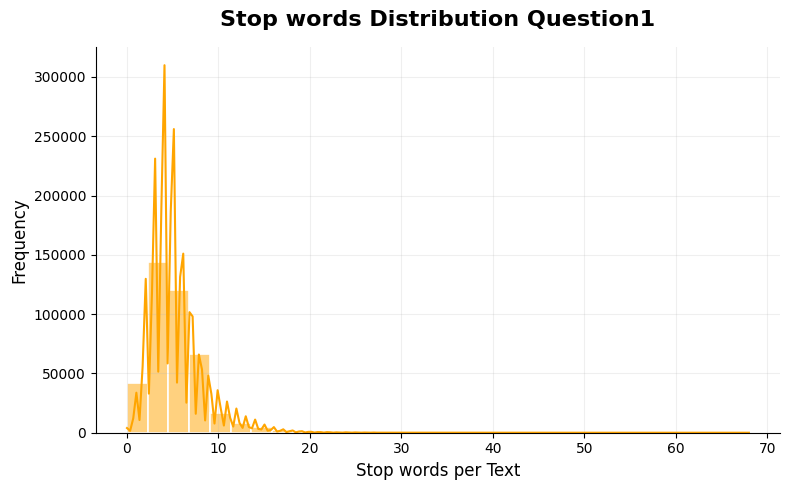

In [122]:
# Stop words Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['q1_stopword_count'], kde=True, color="orange", bins=30, edgecolor='white', linewidth=1.2)
plt.title("Stop words Distribution Question1", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Stop words per Text", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

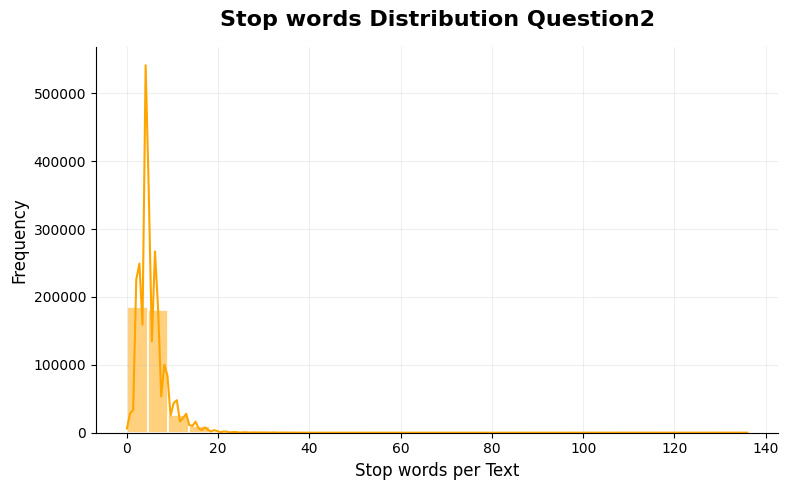

In [123]:
# Word Count Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['q2_stopword_count'], kde=True, color="orange", bins=30, edgecolor='white', linewidth=1.2)
plt.title("Stop words Distribution Question2", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Stop words per Text", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

# Bi-Variate Analysis

In [124]:
# Total number of questions in the dataset
total_questions = pd.concat([df['question1'], df['question2']], axis=0, ignore_index=True)
print(f'Total Questions in the dataset (Question1 + Question2): {len(total_questions)}')

Total Questions in the dataset (Question1 + Question2): 808696


In [125]:
# Total number of Unique questions in the dataset
print(f'Total unique Questions in the dataset (Question1 + Question2): {len(set(total_questions))}')

Total unique Questions in the dataset (Question1 + Question2): 537386


Insight: There is a large gap between total and unique questions, indicating that a significant number of questions appear multiple times within different pairs. This is expected in a duplicate-question detection dataset because:
Many questions are compared against multiple others to check for duplication.
The repeated occurrences help the model learn common phrasing patterns and variations of the same question.
Despite the high repetition, the dataset still contains over half a million unique questions, which ensures substantial linguistic diversity and reduces the risk of overfitting to a small set of frequent questions.

In [126]:
def word_overlap_count(q1, q2):
    w1 = set(str(q1).lower().split())
    w2 = set(str(q2).lower().split())
    return len(w1 & w2)

df['word_overlap'] = df.apply(lambda x: word_overlap_count(x['question1'], x['question2']), axis=1)

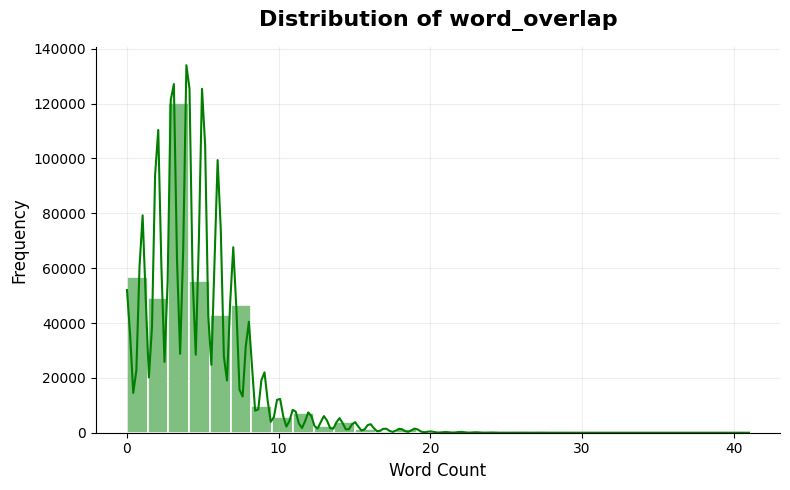

In [127]:
# Word Overlap Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['word_overlap'], kde=True, color="green", bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of word_overlap", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

Insight: Most question pairs in the dataset share few or no common words, which suggests that Simple lexical similarity features (like word overlap) will not be sufficient for detecting duplicates. Many duplicate questions may be paraphrased, requiring deeper semantic understanding instead of surface-level word matching.However, when word overlap is high, it likely serves as a strong indicator of duplication.

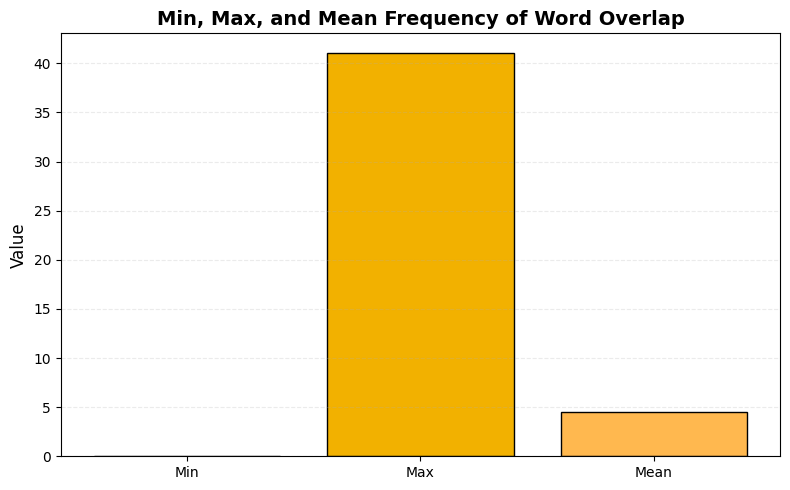

In [128]:
# Calculate statistics
min_val = df['word_overlap'].min()
max_val = df['word_overlap'].max()
mean_val = df['word_overlap'].mean()

labels = ['Min', 'Max', 'Mean']
values = [min_val, max_val, mean_val]

plt.figure(figsize=(8, 5))

# Aesthetic color palette
colors = ["#FFBC56", "#F2B100", "#FFB84F"]  # harmonious blue tones

plt.bar(labels, values, color=colors, edgecolor='black', linewidth=1)

# Title & labels
plt.title("Min, Max, and Mean Frequency of Word Overlap", 
          fontsize=14, fontweight='bold')
plt.ylabel("Value", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.25)

plt.tight_layout()
plt.show()

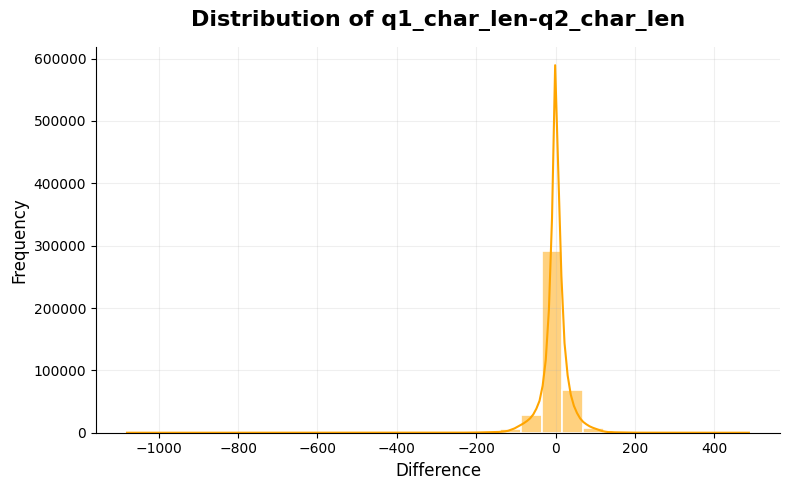

In [129]:
df['q1_char_len-q2_char_len'] = df['question1_character_len'] - df['question2_character_len']

# Text Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['q1_char_len-q2_char_len'], kde=True, color='orange', bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of q1_char_len-q2_char_len", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Difference", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

Insight: The plot shows how much longer or shorter Question1 is compared to Question2 in each pair. The distribution is strongly centered around 0, meaning in most cases, both questions have very similar character lengths. There is a sharp, high peak close to 0 difference, indicating that many question pairs differ by only a few characters. A moderate spread exists on both sides (positive and negative), showing cases where one question is longer than the other by 20–50 characters. Extreme differences (e.g., +400 or −1000) exist but are very rare, forming long tails in the distribution. The overall shape is symmetric with slight skewness, suggesting no strong bias toward one question typically being longer.

Jaccard Similarity is a statistical measure used to compare the similarity between two sets.
In the context of text analysis, it checks how many words two sentences share relative to the total number of unique words in both sentences.

In [133]:
def jaccard_similarity(q1_series, q2_series):
    # Lowercase + split each sentence into sets
    w1 = q1_series.str.lower().str.split().apply(set)
    w2 = q2_series.str.lower().str.split().apply(set)
    
    # Intersection and Union for each row
    intersection = w1.combine(w2, lambda a, b: a & b)
    union = w1.combine(w2, lambda a, b: a | b)
    
    # Return similarity for each row
    return intersection.str.len() / union.str.len()

df['jaccard_similarity_q1q2'] = jaccard_similarity(df['question1'], df['question2'])

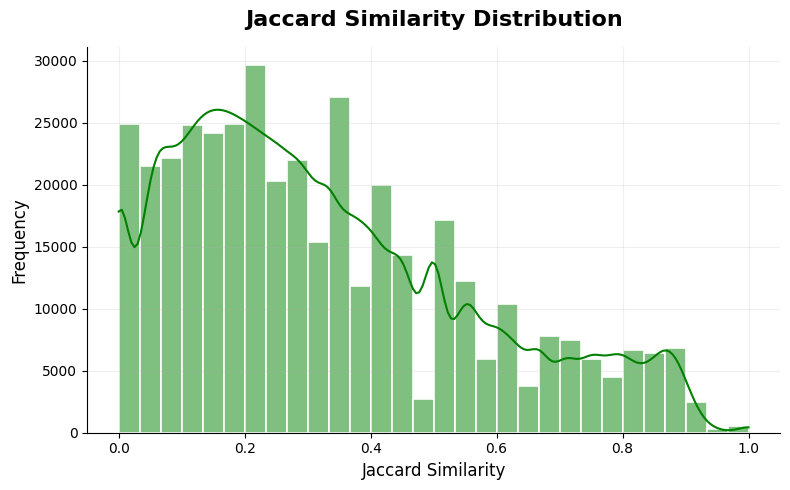

In [135]:
# Jaccard Similarity Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['jaccard_similarity_q1q2'], kde=True, color="green", bins=30, edgecolor='white', linewidth=1.2)
plt.title("Jaccard Similarity Distribution", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Jaccard Similarity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

### WordCloud

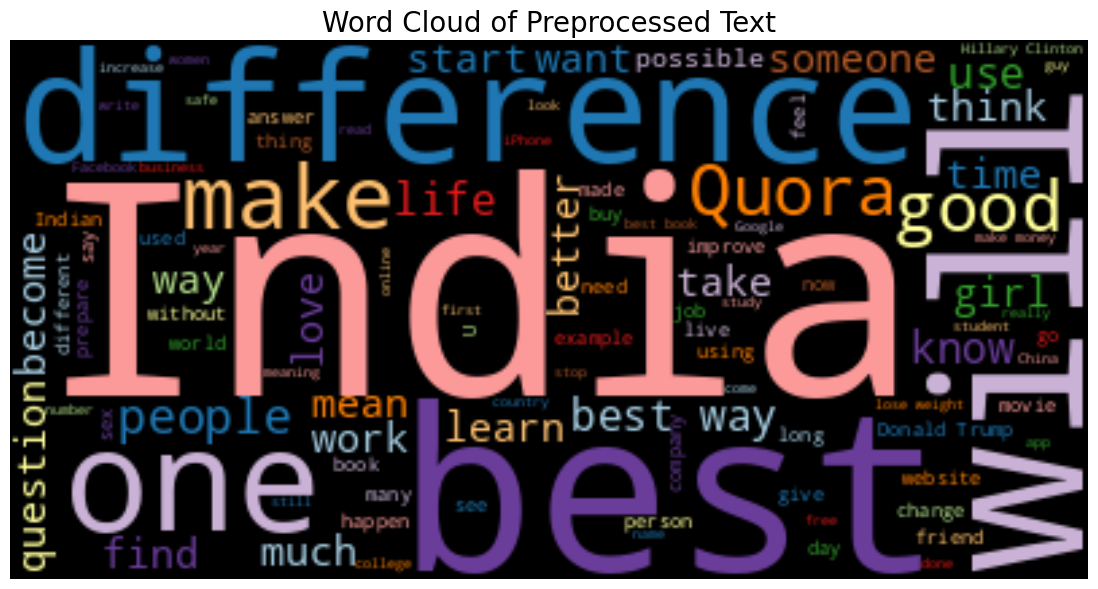

In [139]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=400, 
          height=200, 
          max_words=100, 
          background_color='black',
          colormap='Paired').generate(" ".join(df['question1'].values))

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Preprocessed Text", fontsize=20)
plt.show()

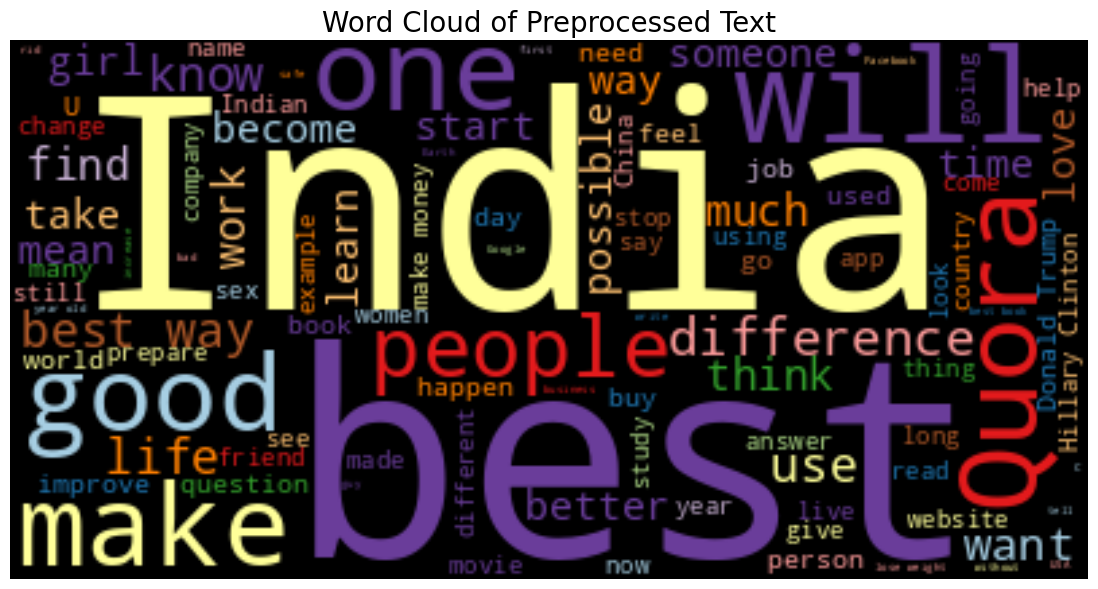

In [141]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=400, 
          height=200, 
          max_words=100, 
          background_color='black',
          colormap='Paired').generate(" ".join(df['question2'].values))

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Preprocessed Text", fontsize=20)
plt.show()